In [ ]:
!pip install pycaret[full]

In [73]:
import numpy as np
import pandas as pd

from pycaret.regression import *
from pycaret.utils import *
from sklearn.metrics import mean_squared_error
import datetime

In [74]:
FEATURE_COLUMNS = ["is_rush_hour", "is_work_hour", "is_night_time", "is_late_night_time"]
CATEGORICAL_COLUMNS = ["weatherStatus"]
USELESS_COLUMNS = ['node_start', 'node_finish', 'lon_start', 'lon_end', 'lat_end', 'lat_start']
AGG_COLUMNS = ['distance',
 'speed',
 'mapillary',
 'mapillary.1',
 'highway_bus_stop',
 'highway_crossing',
 'highway_give_way',
 'highway_motorway_junction',
 'highway_traffic_signals',
 'bus_yes',
 'tactile_paving_no',
 'tactile_paving_yes',
 'trolleybus_yes',
 'button_operated_no',
 'button_operated_yes',
 'crossing_marked',
 'crossing_no',
 'crossing_traffic_signals',
 'crossing_uncontrolled',
 'crossing_unmarked',
 'crossing_zebra',
 'traffic_signals:sound_no',
 'traffic_signals:sound_yes',
 'traffic_signals:vibration_no',
 'traffic_signals:vibration_yes',
 'railway_level_crossing',
 'railway_tram_level_crossing',
 'railway_tram_stop',
 'railway_tram_stop;tram_level_crossing',
 'crossing:island_no',
 'crossing:island_yes',
 'barrier_block',
 'barrier_bollard',
 'barrier_chain',
 'barrier_entrance',
 'barrier_gate',
 'barrier_height_restrictor',
 'barrier_lift_gate',
 'barrier_swing_gate',
 'traffic_signals_crossing',
 'traffic_signals_signal',
 'traffic_signals_traffic_lights',
 'traffic_signals_tram_priority',
 'kerb_flush',
 'kerb_lowered',
 'kerb_raised',
 'kerb_yes',
 'direction_backward',
 'direction_forward',
 'traffic_signals:direction_both',
 'traffic_signals:direction_forward',
 'crossing_ref_zebra',
 'disused:trolleybus_yes',
 'highway.1_bus_stop',
 'highway.1_crossing',
 'highway.1_give_way',
 'highway.1_motorway_junction',
 'highway.1_traffic_signals',
 'bus.1_yes',
 'tactile_paving.1_no',
 'tactile_paving.1_yes',
 'trolleybus.1_yes',
 'button_operated.1_no',
 'button_operated.1_yes',
 'crossing.1_marked',
 'crossing.1_no',
 'crossing.1_traffic_signals',
 'crossing.1_uncontrolled',
 'crossing.1_unmarked',
 'crossing.1_zebra',
 'traffic_signals:sound.1_no',
 'traffic_signals:sound.1_yes',
 'traffic_signals:vibration.1_no',
 'traffic_signals:vibration.1_yes',
 'railway.1_level_crossing',
 'railway.1_tram_level_crossing',
 'railway.1_tram_stop',
 'railway.1_tram_stop;tram_level_crossing',
 'crossing:island.1_no',
 'crossing:island.1_yes',
 'barrier.1_block',
 'barrier.1_bollard',
 'barrier.1_chain',
 'barrier.1_entrance',
 'barrier.1_gate',
 'barrier.1_height_restrictor',
 'barrier.1_lift_gate',
 'traffic_signals.1_crossing',
 'traffic_signals.1_signal',
 'traffic_signals.1_traffic_lights',
 'traffic_signals.1_tram_priority',
 'kerb.1_flush',
 'kerb.1_lowered',
 'kerb.1_raised',
 'kerb.1_yes',
 'direction.1_backward',
 'direction.1_forward',
 'traffic_signals:direction.1_both',
 'traffic_signals:direction.1_forward',
 'crossing_ref.1_zebra',
 'bicycle.1_permissive',
 'bicycle.1_yes',
 'disused:trolleybus.1_yes',
"cluster_start", "cluster_end", "humidity", "visibility", "windspeedKmph", "tempC", ]

In [75]:
dataset = pd.read_csv('datasets/big-table-train.csv')
dataset = dataset.drop(columns=[*USELESS_COLUMNS, 'completed_time'])
dataset

,Id,running_time,route_distance_km,delta_time,distance,speed,mapillary,mapillary.1,highway_bus_stop,highway_crossing,highway_give_way,highway_motorway_junction,highway_traffic_signals,bus_yes,tactile_paving_no,tactile_paving_yes,trolleybus_yes,button_operated_no,button_operated_yes,crossing_marked,crossing_no,crossing_traffic_signals,crossing_uncontrolled,crossing_unmarked,crossing_zebra,traffic_signals:sound_no,traffic_signals:sound_yes,traffic_signals:vibration_no,traffic_signals:vibration_yes,railway_level_crossing,railway_tram_level_crossing,railway_tram_stop,railway_tram_stop;tram_level_crossing,crossing:island_no,crossing:island_yes,barrier_block,barrier_bollard,barrier_chain,barrier_entrance,barrier_gate,barrier_height_restrictor,barrier_lift_gate,barrier_swing_gate,traffic_signals_crossing,traffic_signals_signal,traffic_signals_traffic_lights,traffic_signals_tram_priority,kerb_flush,kerb_lowered,kerb_raised,kerb_yes,direction_backward,direction_forward,traffic_signals:direction_both,traffic_signals:direction_forward,crossing_ref_zebra,disused:trolleybus_yes,highway.1_bus_stop,highway.1_crossing,highway.1_give_way,highway.1_motorway_junction,highway.1_traffic_signals,bus.1_yes,tactile_paving.1_no,tactile_paving.1_yes,trolleybus.1_yes,button_operated.1_no,button_operated.1_yes,crossing.1_marked,crossing.1_no,crossing.1_traffic_signals,crossing.1_uncontrolled,crossing.1_unmarked,crossing.1_zebra,traffic_signals:sound.1_no,traffic_signals:sound.1_yes,traffic_signals:vibration.1_no,traffic_signals:vibration.1_yes,railway.1_level_crossing,railway.1_tram_level_crossing,railway.1_tram_stop,railway.1_tram_stop;tram_level_crossing,crossing:island.1_no,crossing:island.1_yes,barrier.1_block,barrier.1_bollard,barrier.1_chain,barrier.1_entrance,barrier.1_gate,barrier.1_height_restrictor,barrier.1_lift_gate,traffic_signals.1_crossing,traffic_signals.1_signal,traffic_signals.1_traffic_lights,traffic_signals.1_tram_priority,kerb.1_flush,kerb.1_lowered,kerb.1_raised,kerb.1_yes,direction.1_backward,direction.1_forward,traffic_signals:direction.1_both,traffic_signals:direction.1_forward,crossing_ref.1_zebra,bicycle.1_permissive,bicycle.1_yes,disused:trolleybus.1_yes,cluster_start,cluster_end,is_work_hour,is_night_time,is_late_night_time,is_rush_hour,humidity,visibility,windspeedKmph,tempC,weatherStatus
0,-4773019581999572651,2022-01-24 18:30:21,3.740,862.0,31.771489,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16,16,1,0,0,1,87,10,18,-4,Light snow
1,-4773019581999572651,2022-01-24 18:30:21,3.740,862.0,3.673054,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,1,87,10,18,-4,Light snow
2,-4773019581999572651,2022-01-24 18:30:21,3.740,862.0,15.550612,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,1,87,10,18,-4,Light snow
3,-4773019581999572651,2022-01-24 18:30:21,3.740,862.0,50.034390,29.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [76]:
agg_func = ['sum', 'count', 'mean']
new_agg_columns = [f'{fun}_{col}' for fun in agg_func for col in AGG_COLUMNS]
new_agg_columns

['sum_distance',
 'sum_speed',
 'sum_mapillary',
 'sum_mapillary.1',
 'sum_highway_bus_stop',
 'sum_highway_crossing',
 'sum_highway_give_way',
 'sum_highway_motorway_junction',
 'sum_highway_traffic_signals',
 'sum_bus_yes',
 'sum_tactile_paving_no',
 'sum_tactile_paving_yes',
 'sum_trolleybus_yes',
 'sum_button_operated_no',
 'sum_button_operated_yes',
 'sum_crossing_marked',
 'sum_crossing_no',
 'sum_crossing_traffic_signals',
 'sum_crossing_uncontrolled',
 'sum_crossing_unmarked',
 'sum_crossing_zebra',
 'sum_traffic_signals:sound_no',
 'sum_traffic_signals:sound_yes',
 'sum_traffic_signals:vibration_no',
 'sum_traffic_signals:vibration_yes',
 'sum_railway_level_crossing',
 'sum_railway_tram_level_crossing',
 'sum_railway_tram_stop',
 'sum_railway_tram_stop;tram_level_crossing',
 'sum_crossing:island_no',
 'sum_crossing:island_yes',
 'sum_barrier_block',
 'sum_barrier_bollard',
 'sum_barrier_chain',
 'sum_barrier_entrance',
 'sum_barrier_gate',
 'sum_barrier_height_restrictor',
 's

In [77]:
agg_dict = {}
for col in AGG_COLUMNS:
    agg_dict[col] = agg_func
agg_dict

{'distance': ['sum', 'count', 'mean'],
 'speed': ['sum', 'count', 'mean'],
 'mapillary': ['sum', 'count', 'mean'],
 'mapillary.1': ['sum', 'count', 'mean'],
 'highway_bus_stop': ['sum', 'count', 'mean'],
 'highway_crossing': ['sum', 'count', 'mean'],
 'highway_give_way': ['sum', 'count', 'mean'],
 'highway_motorway_junction': ['sum', 'count', 'mean'],
 'highway_traffic_signals': ['sum', 'count', 'mean'],
 'bus_yes': ['sum', 'count', 'mean'],
 'tactile_paving_no': ['sum', 'count', 'mean'],
 'tactile_paving_yes': ['sum', 'count', 'mean'],
 'trolleybus_yes': ['sum', 'count', 'mean'],
 'button_operated_no': ['sum', 'count', 'mean'],
 'button_operated_yes': ['sum', 'count', 'mean'],
 'crossing_marked': ['sum', 'count', 'mean'],
 'crossing_no': ['sum', 'count', 'mean'],
 'crossing_traffic_signals': ['sum', 'count', 'mean'],
 'crossing_uncontrolled': ['sum', 'count', 'mean'],
 'crossing_unmarked': ['sum', 'count', 'mean'],
 'crossing_zebra': ['sum', 'count', 'mean'],
 'traffic_signals:sound_n

In [78]:
dataset_agg = dataset.groupby(['Id', 'running_time', 'route_distance_km', 'delta_time']) \
    .agg(agg_dict).reset_index()
if len(CATEGORICAL_COLUMNS) > 0:
    dataset_agg[CATEGORICAL_COLUMNS] = dataset[CATEGORICAL_COLUMNS]
if len(FEATURE_COLUMNS) > 0:
    dataset_agg[FEATURE_COLUMNS] = dataset[FEATURE_COLUMNS]
dataset_agg = dataset_agg.drop(columns=['Id'])
dataset_agg['running_time'] = (pd.to_datetime(dataset_agg['running_time']) - datetime.datetime(1970,1,1)).dt.total_seconds()
dataset_agg

running_time route_distance_km delta_time     distance                   \
                                                         sum count       mean   
0     1.643067e+09             3.179      469.0  3002.769444    83  36.177945   
1     1.643058e+09             6.137      688.0  5629.671654   110  51.178833   
2     1.643064e+09             6.312      683.0  5598.776895   156  35.889595   
3     1.643063e+09             6.379      885.0  5041.412407   129  39.080716   
4     1.643045e+09             2.551      612.0  2428.830059    78  31.138847   
...            ...               ...        ...          ...   ...        ...   
4995  1.643065e+09             5.520      753.0  5643.386411   161  35.052090   
4996  1.643057e+09             3.146      462.0  3008.850367    99  30.392428   
4997  1.643002e+09             4.038      607.0  4693.458815    95  49.404830   
4998  1.643056e+09             1.641      223.0  1130.244973    45  25.116555   
4999  1.643050e+09             2.489      368.0  2388.938487    49  48.753847   

       speed                      mapillary                       mapillary.1  \
         sum count       mean           sum count          mean           sum   
0     2157.0    83  25.987952  0.000000e+00    83  0.000000e+00  0.000000e+00   
1     3294.0   110  29.945455  0.000000e+00   110  0.000000e+00  0.000000e+00   
2     5200.5   156  33.336538  0.000000e+00   156  0.000000e+00  0.000000e+00   
3     4573.0   129  35.449612  0.000000e+00   129  0.000000e+00  0.000000e+00   
4     1893.0    78  24.269231  0.000000e+00    78  0.000000e+00  0.000000e+00   
...      ...   ...        ...           ...   ...           ...           ...   
4995  5434.5   161  33.754658  4.636134e+14   161  2.879587e+12  4.636134e+14   
4996  2979.5    99  30.095960  0.000000e+00    99  0.000000e+00  0.000000e+00   
4997  3670.0    95  38.631579  0.000000e+00    95  0.000000e+00  0.000000e+00   
4998  1087.0    45  24.155556  0.000000e+00    45  0.000000e+00  0.000000e+00   
4999  1508.0    49  30.775510  0.000000e+00    49  0.000000e+00  0.000000e+00   

                         highway_bus_stop            highway_crossing        \
     count          mean              sum count mean              sum count   
0       83  0.000000e+00              0.0    83  0.0              5.0    83   
1      110  0.000000e+00              0.0   110  0.0              1.0   110   
2      156  0.000000e+00              0.0   156  0.0             14.0   156   
3      129  0.000000e+00              0.0   129  0.0              2.0   129   
4       78  0.000000e+00              0.0    78  0.0              4.0    78   
...    ...           ...              ...   ...  ...              ...   ...   
4995   161  2.879587e+12              0.0   161  0.0              3.0   161   
4996    99  0.000000e+00              0.0    99  0.0              2.0    99   
4997    95  0.000000e+00              0.0    95  0.0              4.0    95   
4998    45  0.000000e+00              0.0    45  0.0              2.0    45   
4999    49  0.000000e+00              0.0    49  0.0              4.0    49   

               highway_give_way            highway_motorway_junction        \
          mean              sum count mean                       sum count   
0     0.060241              0.0    83  0.0                       0.0    83   
1     0.009091              0.0   110  0.0                       0.0   110   
2     0.089744              0.0   156  0.0                       0.0   156   
3     0.015504              0.0   129  0.0                       0.0   129   
4     0.051282              0.0    78  0.0                       0.0    78   
...        ...              ...   ...  ...                       ...   ...   
4995  0.018634              0.0   161  0.0                       0.0   161   
4996  0.020202              0.0    99  0.0                       0.0    99   
4997  0.042105              0.0    95  0.0                       0.0    95   
4998  0.0444

In [79]:
dataset_agg = pd.DataFrame(dataset_agg.values, columns=['running_time', 'route_distance_km', 'delta_time', *new_agg_columns, *CATEGORICAL_COLUMNS, *FEATURE_COLUMNS])
dataset_agg['delta_time'] = np.log1p(dataset_agg['delta_time'].astype('float'))
dataset_agg

,running_time,route_distance_km,delta_time,sum_distance,sum_speed,sum_mapillary,sum_mapillary.1,sum_highway_bus_stop,sum_highway_crossing,sum_highway_give_way,sum_highway_motorway_junction,sum_highway_traffic_signals,sum_bus_yes,sum_tactile_paving_no,sum_tactile_paving_yes,sum_trolleybus_yes,sum_button_operated_no,sum_button_operated_yes,sum_crossing_marked,sum_crossing_no,sum_crossing_traffic_signals,sum_crossing_uncontrolled,sum_crossing_unmarked,sum_crossing_zebra,sum_traffic_signals:sound_no,sum_traffic_signals:sound_yes,sum_traffic_signals:vibration_no,sum_traffic_signals:vibration_yes,sum_railway_level_crossing,sum_railway_tram_level_crossing,sum_railway_tram_stop,sum_railway_tram_stop;tram_level_crossing,sum_crossing:island_no,sum_crossing:island_yes,sum_barrier_block,sum_barrier_bollard,sum_barrier_chain,sum_barrier_entrance,sum_barrier_gate,sum_barrier_height_restrictor,sum_barrier_lift_gate,sum_barrier_swing_gate,sum_traffic_signals_crossing,sum_traffic_signals_signal,sum_traffic_signals_traffic_lights,sum_traffic_signals_tram_priority,sum_kerb_flush,sum_kerb_lowered,sum_kerb_raised,sum_kerb_yes,sum_direction_backward,sum_direction_forward,sum_traffic_signals:direction_both,sum_traffic_signals:direction_forward,sum_crossing_ref_zebra,sum_disused:trolleybus_yes,sum_highway.1_bus_stop,sum_highway.1_crossing,sum_highway.1_give_way,sum_highway.1_motorway_junction,sum_highway.1_traffic_signals,sum_bus.1_yes,sum_tactile_paving.1_no,sum_tactile_paving.1_yes,sum_trolleybus.1_yes,sum_button_operated.1_no,sum_button_operated.1_yes,sum_crossing.1_marked,sum_crossing.1_no,sum_crossing.1_traffic_signals,sum_crossing.1_uncontrolled,sum_crossing.1_unmarked,sum_crossing.1_zebra,sum_traffic_signals:sound.1_no,sum_traffic_signals:sound.1_yes,sum_traffic_signals:vibration.1_no,sum_traffic_signals:vibration.1_yes,sum_railway.1_level_crossing,sum_railway.1_tram_level_crossing,sum_railway.1_tram_stop,sum_railway.1_tram_stop;tram_level_crossing,sum_crossing:island.1_no,sum_crossing:island.1_yes,sum_barrier.1_block,sum_barrier.1_bollard,sum_barrier.1_chain,sum_barrier.1_entrance,sum_barrier.1_gate,sum_barrier.1_height_restrictor,sum_barrier.1_lift_gate,sum_traffic_signals.1_crossing,sum_traffic_signals.1_signal,sum_traffic_signals.1_traffic_lights,sum_traffic_signals.1_tram_priority,sum_kerb.1_flush,sum_kerb.1_lowered,sum_kerb.1_raised,sum_kerb.1_yes,sum_direction.1_backward,sum_direction.1_forward,sum_traffic_signals:direction.1_both,sum_traffic_signals:direction.1_forward,sum_crossing_ref.1_zebra,sum_bicycle.1_permissive,sum_bicycle.1_yes,sum_disused:trolleybus.1_yes,sum_cluster_start,sum_cluster_end,sum_humidity,sum_visibility,sum_windspeedKmph,sum_tempC,count_distance,count_speed,count_mapillary,count_mapillary.1,count_highway_bus_stop,count_highway_crossing,count_highway_give_way,count_highway_motorway_junction,count_highway_traffic_signals,count_bus_yes,count_tactile_paving_no,count_tactile_paving_yes,count_trolleybus_yes,count_button_operated_no,count_button_operated_yes,count_crossing_marked,count_crossing_no,count_crossing_traffic_signals,count_crossing_uncontrolled,count_crossing_unmarked,count_crossing_zebra,count_traffic_signals:sound_no,count_traffic_signals:sound_yes,count_traffic_signals:vibration_no,count_traffic_signals:vibration_yes,count_railway_level_crossing,count_railway_tram_level_crossing,count_railway_tram_stop,count_railway_tram_stop;tram_level_crossing,count_crossing:island_no,count_crossing:island_yes,count_barrier_block,count_barrier_bollard,count_barrier_chain,count_barrier_entrance,count_barrier_gate,count_barrier_height_restrictor,count_barrier_lift_gate,count_barrier_swing_gate,count_traffic_signals_crossing,count_traffic_signals_signal,count_traffic_signals_traffic_lights,count_traffic_signals_tram_priority,count_kerb_flush,count_kerb_lowered,count_kerb_raised,count_kerb_yes,count_direction_backward,count_direction_forward,count_traffic_signals:direction_both,count_traffic_signals:direction_forward,count_cr

In [109]:
data = dataset_agg.sample(frac=1, random_state=786)
data_unseen = dataset_agg.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5000, 335)
Unseen Data For Predictions: (0, 335)


In [110]:
s = setup(data = data, target = 'delta_time', categorical_features=CATEGORICAL_COLUMNS, session_id=123, use_gpu=False, normalize = True)

,Description,Value
0,Session id,123
1,Target,delta_time
2,Target type,Regression
3,Original data shape,"(5000, 335)"
4,Transformed data shape,"(5000, 335)"
5,Transformed train set shape,"(3500, 335)"
6,Transformed test set shape,"(1500, 335)"
7,Categorical features,1
8,Preprocess,True
9,Imputation type,simple


In [70]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:59:13
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.1698,0.0513,0.2262,0.6728,0.0317,0.0273,0.6570
rf,Random Forest Regressor,0.1708,0.0519,0.2273,0.6694,0.0318,0.0274,1.6090
lightgbm,Light Gradient Boosting Machine,0.1695,0.0522,0.2281,0.6672,0.0320,0.0272,0.2280
et,Extra Trees Regressor,0.1778,0.0556,0.2354,0.6457,0.0330,0.0286,1.1280
xgboost,Extreme Gradient Boosting,0.1775,0.0567,0.2379,0.6382,0.0333,0.0285,0.5880
ada,AdaBoost Regressor,0.2075,0.0669,0.2584,0.5730,0.0359,0.0331,0.3900
br,Bayesian Ridge,0.2012,0.0701,0.2643,0.5533,0.0369,0.0323,0.1610
omp,Orthogonal Matching Pursuit,0.1993,0.0705,0.2647,0.5503,0.0368,0.0320,0.1590
huber,Huber Regressor,0.2029,0.0839,0.2836,0.4651,0.0437,0.0326,0.2330
ridge,Ridge Regression,0.2057,0.0859,0.2868,0.4517,0.0390,0.0330,0.1520


KeyboardInterrupt: 

In [111]:
best_model = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1520,0.0416,0.2039,0.7354,0.0288,0.0245
1,0.1584,0.0451,0.2124,0.6955,0.0294,0.0251
2,0.1663,0.0495,0.2226,0.6468,0.0310,0.0266
3,0.1740,0.0592,0.2434,0.6348,0.0342,0.0280
4,0.1619,0.0470,0.2168,0.6985,0.0304,0.0260
5,0.1721,0.0524,0.2288,0.6549,0.0322,0.0277
6,0.1713,0.0547,0.2338,0.6379,0.0327,0.0275
7,0.1635,0.0500,0.2236,0.7131,0.0319,0.0268
8,0.1631,0.0472,0.2173,0.6936,0.0306,0.0263


In [112]:
tuned_best_model = tune_model(best_model, n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1552,0.0428,0.2070,0.7274,0.0292,0.0251
1,0.1605,0.0461,0.2146,0.6890,0.0297,0.0255
2,0.1695,0.0509,0.2256,0.6370,0.0314,0.0271
3,0.1757,0.0605,0.2460,0.6269,0.0345,0.0282
4,0.1699,0.0507,0.2251,0.6752,0.0315,0.0273
5,0.1760,0.0537,0.2317,0.6462,0.0325,0.0283
6,0.1764,0.0560,0.2367,0.6288,0.0330,0.0282
7,0.1671,0.0514,0.2267,0.7051,0.0324,0.0273
8,0.1671,0.0493,0.2221,0.6800,0.0313,0.0270


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


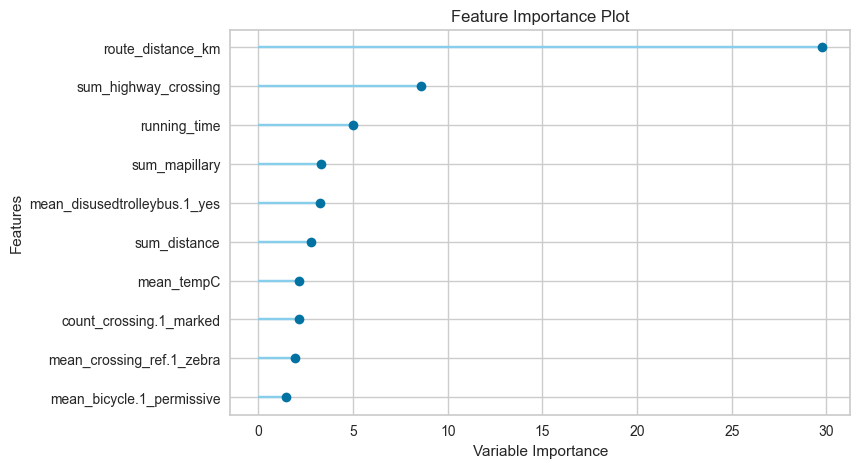

In [113]:
plot_model(tuned_best_model, 'feature')

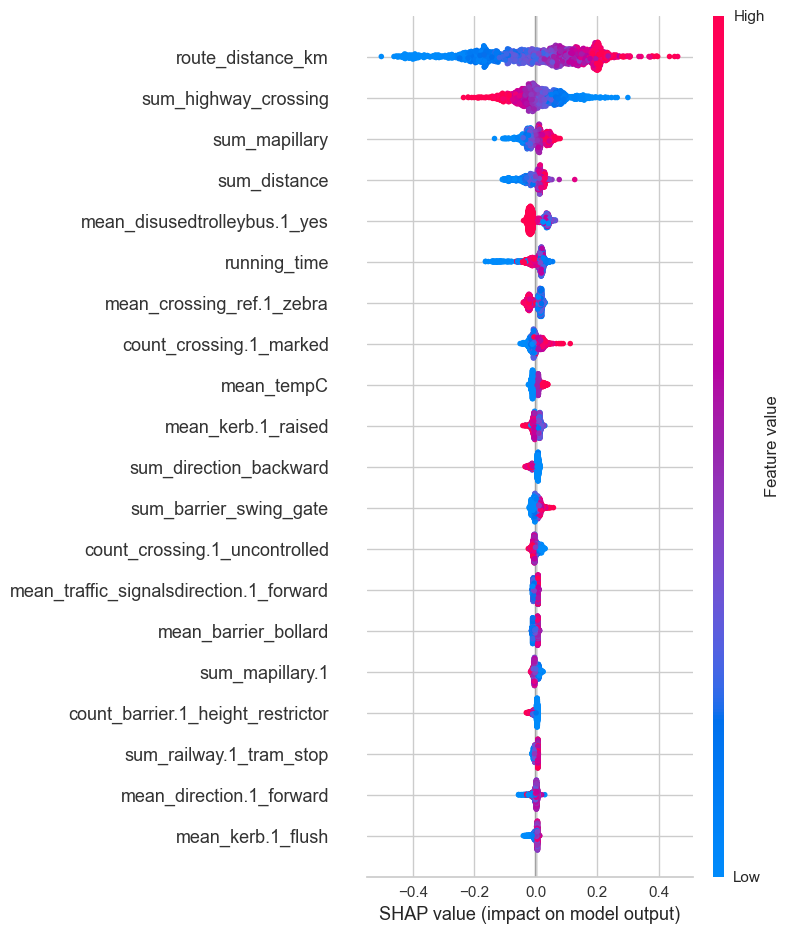

In [114]:
interpret_model(tuned_best_model)

In [88]:
# validate on unseen data
unseen_predictions = predict_model(tuned_best_model, data=data_unseen)
unseen_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.1581,0.0468,0.2163,0.7133,0.0305,0.0256


,running_time,route_distance_km,sum_distance,sum_speed,sum_mapillary,sum_mapillary.1,sum_highway_bus_stop,sum_highway_crossing,sum_highway_give_way,sum_highway_motorway_junction,sum_highway_traffic_signals,sum_bus_yes,sum_tactile_paving_no,sum_tactile_paving_yes,sum_trolleybus_yes,sum_button_operated_no,sum_button_operated_yes,sum_crossing_marked,sum_crossing_no,sum_crossing_traffic_signals,sum_crossing_uncontrolled,sum_crossing_unmarked,sum_crossing_zebra,sum_traffic_signals:sound_no,sum_traffic_signals:sound_yes,sum_traffic_signals:vibration_no,sum_traffic_signals:vibration_yes,sum_railway_level_crossing,sum_railway_tram_level_crossing,sum_railway_tram_stop,sum_railway_tram_stop;tram_level_crossing,sum_crossing:island_no,sum_crossing:island_yes,sum_barrier_block,sum_barrier_bollard,sum_barrier_chain,sum_barrier_entrance,sum_barrier_gate,sum_barrier_height_restrictor,sum_barrier_lift_gate,sum_barrier_swing_gate,sum_traffic_signals_crossing,sum_traffic_signals_signal,sum_traffic_signals_traffic_lights,sum_traffic_signals_tram_priority,sum_kerb_flush,sum_kerb_lowered,sum_kerb_raised,sum_kerb_yes,sum_direction_backward,sum_direction_forward,sum_traffic_signals:direction_both,sum_traffic_signals:direction_forward,sum_crossing_ref_zebra,sum_disused:trolleybus_yes,sum_highway.1_bus_stop,sum_highway.1_crossing,sum_highway.1_give_way,sum_highway.1_motorway_junction,sum_highway.1_traffic_signals,sum_bus.1_yes,sum_tactile_paving.1_no,sum_tactile_paving.1_yes,sum_trolleybus.1_yes,sum_button_operated.1_no,sum_button_operated.1_yes,sum_crossing.1_marked,sum_crossing.1_no,sum_crossing.1_traffic_signals,sum_crossing.1_uncontrolled,sum_crossing.1_unmarked,sum_crossing.1_zebra,sum_traffic_signals:sound.1_no,sum_traffic_signals:sound.1_yes,sum_traffic_signals:vibration.1_no,sum_traffic_signals:vibration.1_yes,sum_railway.1_level_crossing,sum_railway.1_tram_level_crossing,sum_railway.1_tram_stop,sum_railway.1_tram_stop;tram_level_crossing,sum_crossing:island.1_no,sum_crossing:island.1_yes,sum_barrier.1_block,sum_barrier.1_bollard,sum_barrier.1_chain,sum_barrier.1_entrance,sum_barrier.1_gate,sum_barrier.1_height_restrictor,sum_barrier.1_lift_gate,sum_traffic_signals.1_crossing,sum_traffic_signals.1_signal,sum_traffic_signals.1_traffic_lights,sum_traffic_signals.1_tram_priority,sum_kerb.1_flush,sum_kerb.1_lowered,sum_kerb.1_raised,sum_kerb.1_yes,sum_direction.1_backward,sum_direction.1_forward,sum_traffic_signals:direction.1_both,sum_traffic_signals:direction.1_forward,sum_crossing_ref.1_zebra,sum_bicycle.1_permissive,sum_bicycle.1_yes,sum_disused:trolleybus.1_yes,sum_cluster_start,sum_cluster_end,sum_humidity,sum_visibility,sum_windspeedKmph,sum_tempC,count_distance,count_speed,count_mapillary,count_mapillary.1,count_highway_bus_stop,count_highway_crossing,count_highway_give_way,count_highway_motorway_junction,count_highway_traffic_signals,count_bus_yes,count_tactile_paving_no,count_tactile_paving_yes,count_trolleybus_yes,count_button_operated_no,count_button_operated_yes,count_crossing_marked,count_crossing_no,count_crossing_traffic_signals,count_crossing_uncontrolled,count_crossing_unmarked,count_crossing_zebra,count_traffic_signals:sound_no,count_traffic_signals:sound_yes,count_traffic_signals:vibration_no,count_traffic_signals:vibration_yes,count_railway_level_crossing,count_railway_tram_level_crossing,count_railway_tram_stop,count_railway_tram_stop;tram_level_crossing,count_crossing:island_no,count_crossing:island_yes,count_barrier_block,count_barrier_bollard,count_barrier_chain,count_barrier_entrance,count_barrier_gate,count_barrier_height_restrictor,count_barrier_lift_gate,count_barrier_swing_gate,count_traffic_signals_crossing,count_traffic_signals_signal,count_traffic_signals_traffic_lights,count_traffic_signals_tram_priority,count_kerb_flush,count_kerb_lowered,count_kerb_raised,count_kerb_yes,count_direction_backward,count_direction_forward,count_traffic_signals:direction_both,count_traffic_signals:direction_forward,count_crossing_ref_

In [90]:
(mean_squared_error(np.expm1(unseen_predictions['delta_time']), np.expm1(unseen_predictions['prediction_label']), squared=False))

114.29677256053886

### Model predictions on test data

In [93]:
test_dataset = pd.read_csv("datasets/big-table-test.csv")
test_dataset = test_dataset.drop(columns=USELESS_COLUMNS)
test_dataset[['barrier.1_chain', 'barrier.1_height_restrictor', 'barrier_chain', 'barrier_height_restrictor', 'bicycle.1_permissive', 'highway.1_motorway_junction', 'highway_motorway_junction']] = 0 
test_dataset

,Id,running_time,route_distance_km,distance,speed,mapillary,mapillary.1,highway_bus_stop,highway_crossing,highway_give_way,highway_traffic_signals,bus_yes,tactile_paving_no,tactile_paving_yes,trolleybus_yes,button_operated_no,button_operated_yes,crossing_marked,crossing_no,crossing_traffic_signals,crossing_uncontrolled,crossing_unmarked,crossing_zebra,traffic_signals:sound_no,traffic_signals:sound_yes,traffic_signals:vibration_no,traffic_signals:vibration_yes,railway_level_crossing,railway_tram_level_crossing,railway_tram_stop,railway_tram_stop;tram_level_crossing,crossing:island_no,crossing:island_yes,barrier_block,barrier_bollard,barrier_entrance,barrier_gate,barrier_lift_gate,barrier_swing_gate,traffic_signals_crossing,traffic_signals_signal,traffic_signals_traffic_lights,traffic_signals_tram_priority,kerb_flush,kerb_lowered,kerb_raised,kerb_yes,direction_backward,direction_forward,traffic_signals:direction_both,traffic_signals:direction_forward,crossing_ref_zebra,disused:trolleybus_yes,highway.1_bus_stop,highway.1_crossing,highway.1_give_way,highway.1_traffic_signals,bus.1_yes,tactile_paving.1_no,tactile_paving.1_yes,trolleybus.1_yes,button_operated.1_no,button_operated.1_yes,crossing.1_marked,crossing.1_no,crossing.1_traffic_signals,crossing.1_uncontrolled,crossing.1_unmarked,crossing.1_zebra,traffic_signals:sound.1_no,traffic_signals:sound.1_yes,traffic_signals:vibration.1_no,traffic_signals:vibration.1_yes,railway.1_level_crossing,railway.1_tram_level_crossing,railway.1_tram_stop,railway.1_tram_stop;tram_level_crossing,crossing:island.1_no,crossing:island.1_yes,barrier.1_block,barrier.1_bollard,barrier.1_entrance,barrier.1_gate,barrier.1_lift_gate,traffic_signals.1_crossing,traffic_signals.1_signal,traffic_signals.1_traffic_lights,traffic_signals.1_tram_priority,kerb.1_flush,kerb.1_lowered,kerb.1_raised,kerb.1_yes,direction.1_backward,direction.1_forward,traffic_signals:direction.1_both,traffic_signals:direction.1_forward,crossing_ref.1_zebra,bicycle.1_yes,disused:trolleybus.1_yes,cluster_start,cluster_end,is_work_hour,is_night_time,is_late_night_time,is_rush_hour,humidity,visibility,windspeedKmph,tempC,weatherStatus,barrier.1_chain,barrier.1_height_restrictor,barrier_chain,barrier_height_restrictor,bicycle.1_permissive,highway.1_motorway_junction,highway_motorway_junction
0,6198,2022-01-24 03:38:30,4.744,138.795710,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1,0,84,10,24,-5,Clear,0,0,0,0,0,0,0
1,6198,2022-01-24 03:38:30,4.744,95.273001,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76,76,0,0,1,0,84,10,24,-5,Clear,0,0,0,0,0,0,0
2,6198,2022-01-24 03:38:30,4.744,137.647881,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,76,0,0,1,0,84,10,24,-5,Clear,0,0,0,0,0,0,0
3,6198,2022-01-24 03:38:30,4.744,4.383708,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [94]:
prediction_agg = test_dataset.groupby(['Id', 'running_time', 'route_distance_km']) \
    .agg(agg_dict).reset_index()
if len(CATEGORICAL_COLUMNS) > 0:
    prediction_agg[CATEGORICAL_COLUMNS] = test_dataset[CATEGORICAL_COLUMNS]
if len(FEATURE_COLUMNS) > 0:
    prediction_agg[FEATURE_COLUMNS] = test_dataset[FEATURE_COLUMNS]
prediction_agg = prediction_agg.drop(columns=['Id'])
prediction_agg['running_time'] = (pd.to_datetime(prediction_agg['running_time']) - datetime.datetime(1970,1,1)).dt.total_seconds()
prediction_agg['delta_time'] = 0
prediction_agg

running_time route_distance_km      distance                     speed  \
                                              sum count       mean      sum   
0    1.642996e+09             4.744   4706.362035    89  52.880472   4234.0   
1    1.642996e+09             6.279   6238.545582   172  36.270614   7125.0   
2    1.642996e+09             3.934   3905.904002    71  55.012732   2835.0   
3    1.642997e+09             5.959   5949.408002   179  33.236916   6772.0   
4    1.642997e+09             7.028   7014.933334   190  36.920702   7289.0   
..            ...               ...           ...   ...        ...      ...   
995  1.643050e+09             2.897   2895.784059    60  48.263068   2287.0   
996  1.643050e+09             3.482   3483.059160    91  38.275375   3369.0   
997  1.643050e+09             3.486   3440.951601   125  27.527613   4602.0   
998  1.643050e+09             0.703    702.519259    22  31.932694    788.0   
999  1.643050e+09            10.127  10107.546638   228  44.331345  11010.0   

                     mapillary            mapillary.1             \
    count       mean       sum count mean         sum count mean   
0      89  47.573034       0.0    89  0.0         0.0    89  0.0   
1     172  41.424419       0.0   172  0.0         0.0   172  0.0   
2      71  39.929577       0.0    71  0.0         0.0    71  0.0   
3     179  37.832402       0.0   179  0.0         0.0   179  0.0   
4     190  38.363158       0.0   190  0.0         0.0   190  0.0   
..    ...        ...       ...   ...  ...         ...   ...  ...   
995    60  38.116667       0.0    60  0.0         0.0    60  0.0   
996    91  37.021978       0.0    91  0.0         0.0    91  0.0   
997   125  36.816000       0.0   125  0.0         0.0   125  0.0   
998    22  35.818182       0.0    22  0.0         0.0    22  0.0   
999   228  48.289474       0.0   228  0.0         0.0   228  0.0   

    highway_bus_stop                 highway_crossing                  \
                 sum count      mean              sum count      mean   
0                0.0    89  0.000000              3.0    89  0.033708   
1                1.0   172  0.005814             17.0   172  0.098837   
2                0.0    71  0.000000              3.0    71  0.042254   
3                0.0   179  0.000000             10.0   179  0.055866   
4                0.0   190  0.000000             11.0   190  0.057895   
..               ...   ...       ...              ...   ...       ...   
995              0.0    60  0.000000              2.0    60  0.033333   
996              0.0    91  0.000000              3.0    91  0.032967   
997              0.0   125  0.000000              7.0   125  0.056000   
998              0.0    22  0.000000              0.0    22  0.000000   
999              1.0   228  0.004386             14.0   228  0.061404   

    highway_give_way            highway_motorway_junction             \
                 sum count mean                       sum count mean   
0                0.0    89  0.0                         0    89  0.0   
1                0.0   172  0.0                         0   172  0.0   
2                0.0    71  0.0                         0    71  0.0   
3                0.0   179  0.0                         0   179  0.0   
4                0.0   190  0.0                         0   190  0.0   
..               ...   ...  ...                       ...   ...  ...   
995              0.0    60  0.0                         0    60  0.0   
996              0.0    91  0.0                         0    91  0.0   
997              0.0   125  0.0                         0   125  0.0   
998              0.0    22  0.0                         0    22  0.0   
999              0.0   228  0.0                         0   228  0.0   

    highway_traffic_signals                 bus_yes                  \
                        sum count      mean     sum count      mean   
0                       0.0    89  0.000000     5.0    89  0.05

In [96]:
prediction_agg = pd.DataFrame(prediction_agg.values, columns=['running_time', 'route_distance_km', *new_agg_columns, *CATEGORICAL_COLUMNS, *FEATURE_COLUMNS, 'delta_time'])

In [97]:
prediction_agg

,running_time,route_distance_km,sum_distance,sum_speed,sum_mapillary,sum_mapillary.1,sum_highway_bus_stop,sum_highway_crossing,sum_highway_give_way,sum_highway_motorway_junction,sum_highway_traffic_signals,sum_bus_yes,sum_tactile_paving_no,sum_tactile_paving_yes,sum_trolleybus_yes,sum_button_operated_no,sum_button_operated_yes,sum_crossing_marked,sum_crossing_no,sum_crossing_traffic_signals,sum_crossing_uncontrolled,sum_crossing_unmarked,sum_crossing_zebra,sum_traffic_signals:sound_no,sum_traffic_signals:sound_yes,sum_traffic_signals:vibration_no,sum_traffic_signals:vibration_yes,sum_railway_level_crossing,sum_railway_tram_level_crossing,sum_railway_tram_stop,sum_railway_tram_stop;tram_level_crossing,sum_crossing:island_no,sum_crossing:island_yes,sum_barrier_block,sum_barrier_bollard,sum_barrier_chain,sum_barrier_entrance,sum_barrier_gate,sum_barrier_height_restrictor,sum_barrier_lift_gate,sum_barrier_swing_gate,sum_traffic_signals_crossing,sum_traffic_signals_signal,sum_traffic_signals_traffic_lights,sum_traffic_signals_tram_priority,sum_kerb_flush,sum_kerb_lowered,sum_kerb_raised,sum_kerb_yes,sum_direction_backward,sum_direction_forward,sum_traffic_signals:direction_both,sum_traffic_signals:direction_forward,sum_crossing_ref_zebra,sum_disused:trolleybus_yes,sum_highway.1_bus_stop,sum_highway.1_crossing,sum_highway.1_give_way,sum_highway.1_motorway_junction,sum_highway.1_traffic_signals,sum_bus.1_yes,sum_tactile_paving.1_no,sum_tactile_paving.1_yes,sum_trolleybus.1_yes,sum_button_operated.1_no,sum_button_operated.1_yes,sum_crossing.1_marked,sum_crossing.1_no,sum_crossing.1_traffic_signals,sum_crossing.1_uncontrolled,sum_crossing.1_unmarked,sum_crossing.1_zebra,sum_traffic_signals:sound.1_no,sum_traffic_signals:sound.1_yes,sum_traffic_signals:vibration.1_no,sum_traffic_signals:vibration.1_yes,sum_railway.1_level_crossing,sum_railway.1_tram_level_crossing,sum_railway.1_tram_stop,sum_railway.1_tram_stop;tram_level_crossing,sum_crossing:island.1_no,sum_crossing:island.1_yes,sum_barrier.1_block,sum_barrier.1_bollard,sum_barrier.1_chain,sum_barrier.1_entrance,sum_barrier.1_gate,sum_barrier.1_height_restrictor,sum_barrier.1_lift_gate,sum_traffic_signals.1_crossing,sum_traffic_signals.1_signal,sum_traffic_signals.1_traffic_lights,sum_traffic_signals.1_tram_priority,sum_kerb.1_flush,sum_kerb.1_lowered,sum_kerb.1_raised,sum_kerb.1_yes,sum_direction.1_backward,sum_direction.1_forward,sum_traffic_signals:direction.1_both,sum_traffic_signals:direction.1_forward,sum_crossing_ref.1_zebra,sum_bicycle.1_permissive,sum_bicycle.1_yes,sum_disused:trolleybus.1_yes,sum_cluster_start,sum_cluster_end,sum_humidity,sum_visibility,sum_windspeedKmph,sum_tempC,count_distance,count_speed,count_mapillary,count_mapillary.1,count_highway_bus_stop,count_highway_crossing,count_highway_give_way,count_highway_motorway_junction,count_highway_traffic_signals,count_bus_yes,count_tactile_paving_no,count_tactile_paving_yes,count_trolleybus_yes,count_button_operated_no,count_button_operated_yes,count_crossing_marked,count_crossing_no,count_crossing_traffic_signals,count_crossing_uncontrolled,count_crossing_unmarked,count_crossing_zebra,count_traffic_signals:sound_no,count_traffic_signals:sound_yes,count_traffic_signals:vibration_no,count_traffic_signals:vibration_yes,count_railway_level_crossing,count_railway_tram_level_crossing,count_railway_tram_stop,count_railway_tram_stop;tram_level_crossing,count_crossing:island_no,count_crossing:island_yes,count_barrier_block,count_barrier_bollard,count_barrier_chain,count_barrier_entrance,count_barrier_gate,count_barrier_height_restrictor,count_barrier_lift_gate,count_barrier_swing_gate,count_traffic_signals_crossing,count_traffic_signals_signal,count_traffic_signals_traffic_lights,count_traffic_signals_tram_priority,count_kerb_flush,count_kerb_lowered,count_kerb_raised,count_kerb_yes,count_direction_backward,count_direction_forward,count_traffic_signals:direction_both,count_traffic_signals:direction_forward,count_crossing_ref_

In [126]:
data_prediction = prediction_agg
data_prediction.reset_index(drop=True, inplace=True)

In [127]:
data_prediction.shape

(1000, 335)

In [128]:
submission_df = pd.read_csv("datasets/submission.csv")
submission_df

,Id,Predicted
0,6198,489.683075
1,6417,730.051946
2,7054,472.439772
3,9628,767.168783
4,10283,818.129695
...,...,...
995,525706,431.227294
996,526604,532.289666
997,527213,559.884489
998,527520,194.639599


In [129]:
submission_predictions = predict_model(tuned_best_model, data=data_prediction)
submission_predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,6.3954,41.0197,6.4047,0.0000,0,nan


,running_time,route_distance_km,sum_distance,sum_speed,sum_mapillary,sum_mapillary.1,sum_highway_bus_stop,sum_highway_crossing,sum_highway_give_way,sum_highway_motorway_junction,sum_highway_traffic_signals,sum_bus_yes,sum_tactile_paving_no,sum_tactile_paving_yes,sum_trolleybus_yes,sum_button_operated_no,sum_button_operated_yes,sum_crossing_marked,sum_crossing_no,sum_crossing_traffic_signals,sum_crossing_uncontrolled,sum_crossing_unmarked,sum_crossing_zebra,sum_traffic_signals:sound_no,sum_traffic_signals:sound_yes,sum_traffic_signals:vibration_no,sum_traffic_signals:vibration_yes,sum_railway_level_crossing,sum_railway_tram_level_crossing,sum_railway_tram_stop,sum_railway_tram_stop;tram_level_crossing,sum_crossing:island_no,sum_crossing:island_yes,sum_barrier_block,sum_barrier_bollard,sum_barrier_chain,sum_barrier_entrance,sum_barrier_gate,sum_barrier_height_restrictor,sum_barrier_lift_gate,sum_barrier_swing_gate,sum_traffic_signals_crossing,sum_traffic_signals_signal,sum_traffic_signals_traffic_lights,sum_traffic_signals_tram_priority,sum_kerb_flush,sum_kerb_lowered,sum_kerb_raised,sum_kerb_yes,sum_direction_backward,sum_direction_forward,sum_traffic_signals:direction_both,sum_traffic_signals:direction_forward,sum_crossing_ref_zebra,sum_disused:trolleybus_yes,sum_highway.1_bus_stop,sum_highway.1_crossing,sum_highway.1_give_way,sum_highway.1_motorway_junction,sum_highway.1_traffic_signals,sum_bus.1_yes,sum_tactile_paving.1_no,sum_tactile_paving.1_yes,sum_trolleybus.1_yes,sum_button_operated.1_no,sum_button_operated.1_yes,sum_crossing.1_marked,sum_crossing.1_no,sum_crossing.1_traffic_signals,sum_crossing.1_uncontrolled,sum_crossing.1_unmarked,sum_crossing.1_zebra,sum_traffic_signals:sound.1_no,sum_traffic_signals:sound.1_yes,sum_traffic_signals:vibration.1_no,sum_traffic_signals:vibration.1_yes,sum_railway.1_level_crossing,sum_railway.1_tram_level_crossing,sum_railway.1_tram_stop,sum_railway.1_tram_stop;tram_level_crossing,sum_crossing:island.1_no,sum_crossing:island.1_yes,sum_barrier.1_block,sum_barrier.1_bollard,sum_barrier.1_chain,sum_barrier.1_entrance,sum_barrier.1_gate,sum_barrier.1_height_restrictor,sum_barrier.1_lift_gate,sum_traffic_signals.1_crossing,sum_traffic_signals.1_signal,sum_traffic_signals.1_traffic_lights,sum_traffic_signals.1_tram_priority,sum_kerb.1_flush,sum_kerb.1_lowered,sum_kerb.1_raised,sum_kerb.1_yes,sum_direction.1_backward,sum_direction.1_forward,sum_traffic_signals:direction.1_both,sum_traffic_signals:direction.1_forward,sum_crossing_ref.1_zebra,sum_bicycle.1_permissive,sum_bicycle.1_yes,sum_disused:trolleybus.1_yes,sum_cluster_start,sum_cluster_end,sum_humidity,sum_visibility,sum_windspeedKmph,sum_tempC,count_distance,count_speed,count_mapillary,count_mapillary.1,count_highway_bus_stop,count_highway_crossing,count_highway_give_way,count_highway_motorway_junction,count_highway_traffic_signals,count_bus_yes,count_tactile_paving_no,count_tactile_paving_yes,count_trolleybus_yes,count_button_operated_no,count_button_operated_yes,count_crossing_marked,count_crossing_no,count_crossing_traffic_signals,count_crossing_uncontrolled,count_crossing_unmarked,count_crossing_zebra,count_traffic_signals:sound_no,count_traffic_signals:sound_yes,count_traffic_signals:vibration_no,count_traffic_signals:vibration_yes,count_railway_level_crossing,count_railway_tram_level_crossing,count_railway_tram_stop,count_railway_tram_stop;tram_level_crossing,count_crossing:island_no,count_crossing:island_yes,count_barrier_block,count_barrier_bollard,count_barrier_chain,count_barrier_entrance,count_barrier_gate,count_barrier_height_restrictor,count_barrier_lift_gate,count_barrier_swing_gate,count_traffic_signals_crossing,count_traffic_signals_signal,count_traffic_signals_traffic_lights,count_traffic_signals_tram_priority,count_kerb_flush,count_kerb_lowered,count_kerb_raised,count_kerb_yes,count_direction_backward,count_direction_forward,count_traffic_signals:direction_both,count_traffic_signals:direction_forward,count_crossing_ref_

In [130]:
result_df = submission_predictions["prediction_label"].reset_index()
result_df.shape

(1000, 2)

In [131]:
submission_df["Predicted"] = np.expm1(result_df["prediction_label"])

In [132]:
submission_df.to_csv("datasets/submission.csv", index=False)

## Submission phase

Guide: https://www.kaggle.com/code/derrickmwiti/how-to-make-submissions-using-kaggle-s-api/notebook

In [133]:
!pip install kaggle

In [134]:
import os
os.environ["KAGGLE_USERNAME"]="username"
os.environ["KAGGLE_KEY"]="token"

In [135]:
!kaggle competitions submit -c int20h-2023-hackathon  -f ./datasets/submission.csv -m "Baseline"

100%|██████████████████████████████████████| 24.4k/24.4k [00:01<00:00, 13.1kB/s]
400 - Bad Request


In [136]:
!kaggle competitions leaderboard -c int20h-2023-hackathon --show

 teamId  teamName          submissionDate       score    
-------  ----------------  -------------------  -------  
9989061  Leopards          2023-03-05 08:13:32  0.00000  
9988950  4NN               2023-03-05 01:38:10  0.00000  
9988904  Data Insights     2023-03-05 06:45:53  0.00000  
9988991  yakovbondarec     2023-03-05 05:55:41  0.00000  
9988943  ММФ               2023-03-05 07:01:31  0.00000  
9988973  Senku1            2023-03-05 07:09:01  0.00000  
9988978  Denis Shpilka     2023-03-05 07:58:25  0.00000  
9988929  HentAI            2023-03-05 07:26:41  0.00000  
9988901  Жертви Титаніка   2023-03-05 07:34:38  0.00000  
9988955  GridSearchCV      2023-03-05 07:40:17  0.00000  
9989003  Євгеній Толмачов  2023-03-05 07:49:11  0.00000  
9988899  PyTorches         2023-03-05 07:55:01  0.00000  
9989035  Anastasiia Pedan  2023-03-05 07:59:41  0.00000  
9989040  lazy_lizard       2023-03-05 08:09:27  0.00000  


In [137]:
!kaggle competitions submissions -c int20h-2023-hackathon

fileName        date                 description  status    publicScore  privateScore  
--------------  -------------------  -----------  --------  -----------  ------------  
submission.csv  2023-03-05 08:13:32  Baseline     complete  0.00000                    
submission.csv  2023-03-05 01:37:57  Baseline     complete  0.00000                    
submission.csv  2023-03-04 17:52:35  Baseline     complete  0.00000                    
submission.csv  2023-03-04 17:38:47  Baseline     complete  0.00000                    
submission.csv  2023-03-04 17:28:51  Baseline     error                                
